## <span style="color:green"><h1><center>HPC TOOL: DEM Accessing & Processing</center></h1></span>
<center>Prepared by <br>
    <b>Noah Oller Smith, Rajesh Kalyanam, Jibin Joseph and Venkatesh Merwade</b><br> 
Lyles School of Civil Engineering, Purdue University<br>
vmerwade@purdue.edu<br>
<b><br>
    FAIR Science in Water Resources</b><br></center>


## <span style="color:green">Objective</span>
<p style='text-align: justify;'> The objective of this tutorial is to perform the accessing and processing of DEM data for larger watersheds. Once you input the site ID and resolution, the tutorial will output clipped DEM raster for any regions across CONUS.</p> 

In [1]:
site_id = '03612600'
resolution = '1'

In [2]:
params_dem_fetch = {"site_id": site_id,
                    "resolution": resolution}
params_dem_fetch

{'site_id': '03612600', 'resolution': '1'}

## <span style="color:green">HPC tool</span>
<p style='text-align: justify;'> We will use Cyber GIS comupte tool from UIUC</p> 

In [4]:
import cybergis_compute_client
from cybergis_compute_client import CyberGISCompute
import os

## <span style="color:green">Step 1: Access DEM raster tiles to cover the watershed corresponding for given site_id and resolution</span>
<p style='text-align: justify;'> </p> 

In [5]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="Watershed_DEM_Raster_Connector", input_params=params_dem_fetch)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as rkalyana@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [6]:
## Collect the job id from previous job
jobid_dem_connector = cybergis.job.id
jobid_dem_connector

'1711397957UTYVO'

## <span style="color:green">Step 2: Merge the downloaded DEM raster tiles </span>
<p style='text-align: justify;'> </p> 

In [7]:
params_dem_merge = {"input_path": jobid_dem_connector,
                    "merged_filename": f'merged_{resolution}_{site_id}'}
params_dem_merge

{'input_path': '1711397957UTYVO', 'merged_filename': 'merged_1_03612600'}

In [8]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Merging_Processor", input_params=params_dem_merge)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as rkalyana@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [9]:
## Collect the job id from previous job
jobid_dem_merge = cybergis.job.id
jobid_dem_merge

'1711398131S3FpT'

## <span style="color:green">Step 3: Reproject the watershed shapefile and merged raster tile to projected coordinate system </span>
<p style='text-align: justify;'> </p> 

In [10]:
params_dem_reproject = {"raster_path": jobid_dem_merge,
                        "site_id": site_id,
                        "resolution": resolution}
params_dem_reproject

{'raster_path': '1711398131S3FpT', 'site_id': '03612600', 'resolution': '1'}

In [11]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Reprojection_Processor", input_params=params_dem_reproject)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as rkalyana@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING</span>
<p style='text-align: justify;'> </p> 

In [12]:
## Collect the job id from previous job
jobid_dem_reproject = cybergis.job.id
jobid_dem_reproject

'1711398229Ih9on'

## <span style="color:green">Step 4: Clip the reprojected raster tile using the projected watershed shapefile </span>
<p style='text-align: justify;'> </p> 

In [13]:
params_dem_clip = {"raster_path": jobid_dem_reproject,
                   "site_id": site_id,
                   "resolution": resolution}
params_dem_clip

{'raster_path': '1711398229Ih9on', 'site_id': '03612600', 'resolution': '1'}

<h4 style="color:red;"> User Interaction Required </h4>

- Run the cell below 
- Click on "Submit Job" on the "Your Job Status" tabpage 
- Wait until Job is finished (2-3 mins)
- Switch to "Download Job Result" tabpage
- Choose "/" and click on Download
- Wait until downloading is finished
- Proceed to the next cell

In [15]:
cybergis = CyberGISCompute(url="cgjobsup.cigi.illinois.edu", isJupyter=True, protocol="HTTPS", port=443, suffix="v2")
cybergis.show_ui(defaultJob="DEM_Raster_Clipping_Processor", input_params=params_dem_clip)

📃 Found "cybergis_compute_user.json! NOTE: if you want to login as another user, please remove this file
🎯 Logged in as rkalyana@purdue.edu@jupyter.iguide.illinois.edu


## <span style="color:green">VERY IMPORTANT. THERE ARE TWO STEPS HERE AS FOLLOWS: 
1. WAIT UNTIL LAST JOB IS FINISHED. CHECK "Your Job Status" TAB BEFORE PROCEEDING
2. GO TO "DOWNLOAD JOB ..." TAB AND SELECT /preview AND CLICK DOWNLOAD TO SAVE THE FILE LOCALLY FOR PLOTTING</span>
<p style='text-align: justify;'> </p>

## <span style="color:green">Step 5: Visualize the clipped raster data </span>

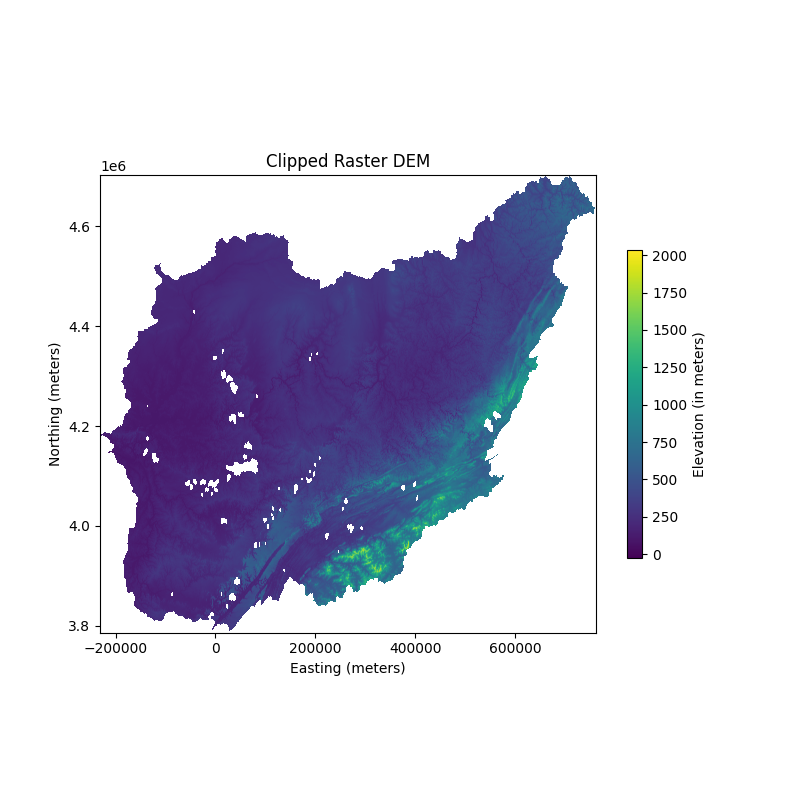

In [16]:
from IPython.display import Image
clipped_raster_output = cybergis.recentDownloadPath
local_raster_filename=fr'{clipped_raster_output}/clipped_raster_{site_id}.png'
Image(filename=local_raster_filename)

## <span style="color:green">We are done. Congratulations! </span>